In [1]:
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("C:\\Users\\Joe\\Downloads\\Churn_Modelling - Churn_Modelling.csv", delimiter=',')
df.shape

(10000, 14)

In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

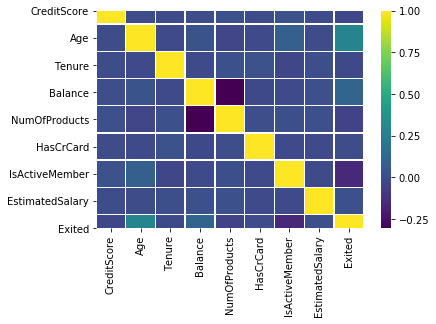

In [9]:
import seaborn as sns
#sns.heatmap(df11.drop(["kitchen_features","fireplaces","floor_covering"], axis=1), linewidths=0.5)
corr= df.corr()

sns.heatmap(corr,linewidths=0.5,cmap="viridis")

In [10]:
corr.sort_values(by=['Exited'],ascending=False).iloc[0].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

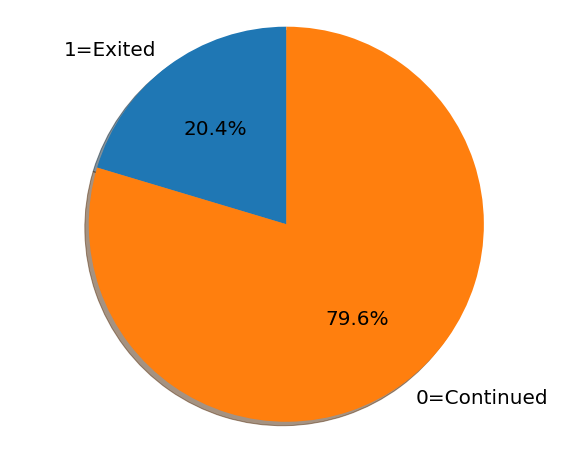

In [11]:
labels = '1=Exited', '0=Continued'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 20} )
ax1.axis('equal')
plt.show()

In [12]:
"""
print(df.Exited.value_counts())
#sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='Exited')
"""

"\nprint(df.Exited.value_counts())\n#sns.set_theme(style='darkgrid')\nax = sns.countplot(data=df,x='Exited')\n"

In [2]:
"""
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
P=sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])

P.set_xlabel('Geography',fontsize=20, fontweight="bold")
P.set_ylabel('count',fontsize=20, fontweight="bold")
P.set_xticklabels(P.get_xticklabels(),fontsize=14, fontweight="bold")

Y=sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
Y.set_xlabel('Gender',fontsize=20, fontweight="bold")
Y.set_ylabel('count',fontsize=20, fontweight="bold")
P.set_xticklabels(P.get_xticklabels(),fontsize=14, fontweight="bold")

sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

"""


'\nfig, axarr = plt.subplots(2, 2, figsize=(20, 12))\nP=sns.countplot(x=\'Geography\', hue = \'Exited\',data = df, ax=axarr[0][0])\n\nP.set_xlabel(\'Geography\',fontsize=20, fontweight="bold")\nP.set_ylabel(\'count\',fontsize=20, fontweight="bold")\nP.set_xticklabels(P.get_xticklabels(),fontsize=14, fontweight="bold")\n\nY=sns.countplot(x=\'Gender\', hue = \'Exited\',data = df, ax=axarr[0][1])\nY.set_xlabel(\'Gender\',fontsize=20, fontweight="bold")\nY.set_ylabel(\'count\',fontsize=20, fontweight="bold")\nP.set_xticklabels(P.get_xticklabels(),fontsize=14, fontweight="bold")\n\nsns.countplot(x=\'HasCrCard\', hue = \'Exited\',data = df, ax=axarr[1][0])\nsns.countplot(x=\'IsActiveMember\', hue = \'Exited\',data = df, ax=axarr[1][1])\n\n'

In [1]:
"""
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])

A=sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
A.set_xlabel('Exited',fontsize=20, fontweight="bold")
A.set_ylabel('Age',fontsize=20, fontweight="bold")
#A.set_xticklabels(P.get_xticklabels(),fontsize=14, fontweight="bold")


sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])

B=sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
B.set_xlabel('Exited',fontsize=20, fontweight="bold")
B.set_ylabel('Balance',fontsize=20, fontweight="bold")
#A.set_xticklabels(P.get_xticklabels(),fontsize=14, fontweight="bold")

sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])
"""

'\nfig, axarr = plt.subplots(3, 2, figsize=(20, 12))\nsns.boxplot(y=\'CreditScore\',x = \'Exited\', hue = \'Exited\',data = df, ax=axarr[0][0])\n\nA=sns.boxplot(y=\'Age\',x = \'Exited\', hue = \'Exited\',data = df , ax=axarr[0][1])\nA.set_xlabel(\'Exited\',fontsize=20, fontweight="bold")\nA.set_ylabel(\'Age\',fontsize=20, fontweight="bold")\n#A.set_xticklabels(P.get_xticklabels(),fontsize=14, fontweight="bold")\n\n\nsns.boxplot(y=\'Tenure\',x = \'Exited\', hue = \'Exited\',data = df, ax=axarr[1][0])\n\nB=sns.boxplot(y=\'Balance\',x = \'Exited\', hue = \'Exited\',data = df, ax=axarr[1][1])\nB.set_xlabel(\'Exited\',fontsize=20, fontweight="bold")\nB.set_ylabel(\'Balance\',fontsize=20, fontweight="bold")\n#A.set_xticklabels(P.get_xticklabels(),fontsize=14, fontweight="bold")\n\nsns.boxplot(y=\'NumOfProducts\',x = \'Exited\', hue = \'Exited\',data = df, ax=axarr[2][0])\nsns.boxplot(y=\'EstimatedSalary\',x = \'Exited\', hue = \'Exited\',data = df, ax=axarr[2][1])\n'

In [15]:
df['CreditScore/Age'] = df.CreditScore/(df.Age)

In [3]:
df['Balance/Salary'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='Balance/Salary',x = 'Exited', hue = 'Exited',data = df)
#plt.ylim(-1, 5)

NameError: name 'df' is not defined

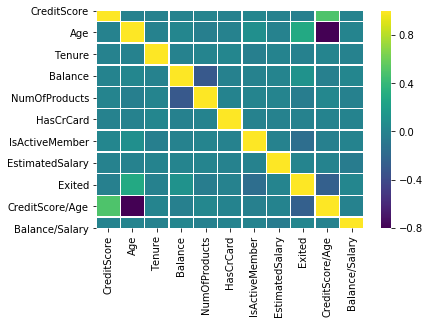

In [17]:
import seaborn as sns

corr= df.corr()

sns.heatmap(corr,linewidths=0.5,cmap="viridis")

In [18]:
corr.sort_values(by=['Exited'],ascending=False).iloc[0].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
Balance/Salary     0.025558
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
CreditScore/Age   -0.253437
Name: Exited, dtype: float64

In [19]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'Balance/Salary','CreditScore/Age']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df = df[['Exited'] + continuous_vars + cat_vars]
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Balance/Salary,CreditScore/Age,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,14.829268,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,11.952381,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,17.923077,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,19.767442,1,1,Spain,Female


In [20]:
df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Balance/Salary,CreditScore/Age,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,14.829268,-1,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,11.952381,1,-1,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,17.923077,-1,-1,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,19.767442,1,1,Spain,Female


In [21]:
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df[i].dtype == np.str or df[i].dtype == np.object):
        for j in df[i].unique():
            df[i+'_'+j] = np.where(df[i] == j,1,-1)
        remove.append(i)
df = df.drop(remove, axis=1)
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Balance/Salary,CreditScore/Age,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,101348.88,0.000000,14.738095,1,1,1,-1,-1,1,-1
1,0,608,41,1,83807.86,1,112542.58,0.744677,14.829268,-1,1,-1,1,-1,1,-1
2,1,502,42,8,159660.80,3,113931.57,1.401375,11.952381,1,-1,1,-1,-1,1,-1
3,0,699,39,1,0.00,2,93826.63,0.000000,17.923077,-1,-1,1,-1,-1,1,-1
4,0,850,43,2,125510.82,1,79084.10,1.587055,19.767442,1,1,-1,1,-1,1,-1


In [22]:
minVec = df[continuous_vars].min().copy()
maxVec = df[continuous_vars].max().copy()
df[continuous_vars] = (df[continuous_vars]-minVec)/(maxVec-minVec)
df.shape

(10000, 16)

In [23]:
df_train = df.sample(frac=0.7,random_state=200)
tmp_df = df.drop(df_train.index)
test_df = tmp_df.sample(frac=0.33333, random_state=200)
valid_df = tmp_df.drop(test_df.index)

print(len(df_train))
print(len(test_df))
del tmp_df

7000
1000


In [24]:
train_file=df_train.to_numpy()
train_X= train_file[:,1:16]
train_y= train_file[:,1]
train_X = np.array(train_X, dtype=np.float64)
train_y = np.array(train_y, dtype=np.int64)


valid_file=valid_df.to_numpy()
valid_X= valid_file[:,1:16]
valid_y= valid_file[:,1]
valid_X = np.array(valid_X, dtype=np.float64)
valid_y = np.array(valid_y, dtype=np.int64)

test_file=test_df.to_numpy()
test_X= test_file[:,1:16]
test_y= test_file[:,1]
test_X = np.array(test_X, dtype=np.float64)
test_y = np.array(test_y, dtype=np.int64)
print(set(train_y))

{0, 1}


In [25]:
from imblearn.over_sampling import SMOTE
smot= SMOTE()
X_smot, y_smot= smot.fit_sample(train_X,train_y)


In [26]:
def linear(H):
    return H

def ReLU(H):
    return H*(H> 0)

def softmax(H):
    eH= np.exp(H)
    return eH/eH.sum(axis=1, keepdims=True)

def cross_entropy(Y, P_hat):
    return -np.sum(Y*np.log(P_hat))


def one_hot_encode(y):
    N= len(y)
    K= len(set(y))
    Y=np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]]=1
        
    return Y

def accuracy(y, y_hat):
    return np.mean(y==y_hat)

def OLS(Y,Y_hat):
    
    return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

def R2(Y,Y_hat):
    return (1- (np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [27]:
class ANN():
    def __init__(self, mode=0):
        self.mode=mode


    def fit(self, X,y, neurons =10, eta =1e-3, epochs=1e3, show_curve =False):
        epochs = int(epochs)
        if self.mode:
            Y=y
        else:
            Y= one_hot_encode(y)

        N,D =X.shape
        K=Y.shape[1]

        self.W = {l: np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D, neurons],
                                                                     [neurons,K]),1)}
        self.b = {l:np.random.randn(M) for l,M in enumerate([neurons, K],1)}

        if self.mode:
            self.a ={1:np.tanh, 2:linear}
        else:
            self.a ={1:np.tanh, 2:softmax}

        J= np.zeros(epochs)
        for epoch in range(epochs):
            self.forward(X)

            if self.mode:
                J[epoch]=OLS(Y, self.Z[2])
            else: 
                J[epoch]=cross_entropy(Y, self.Z[2])

            self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
            self.b[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)

            self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
            self.b[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)
      
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.show()

    def forward(self, X):
        self.Z={0:X}
        for l in sorted(self.W.keys()):
            self.Z[l]= self.a[l](self.Z[l-1]@self.W[l]+self.b[l]) 

    def predict(self, X):
        self.forward(X)
        if self.mode:
            return self.Z[2]
        else:
            return self.Z[2].argmax(axis=1)

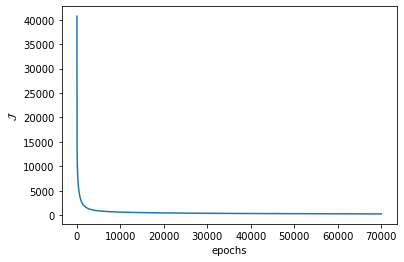

In [28]:
ann_for =ANN()
#ann_for.fit(train_X,train_y, neurons =30, eta =3e-2, epochs=7e3, show_curve =True)
#ann_for.fit(train_X,train_y, neurons =20, eta =3e-2, epochs=7e3, show_curve =True)
ann_for.fit(X_smot,y_smot, neurons =20, eta =3e-2, epochs=7e4, show_curve =True)

In [29]:
#y_hatFor_train = ann_for.predict(train_X)
y_hatFor_train = ann_for.predict(X_smot)
y_hatFor_valid = ann_for.predict(valid_X)
y_hatFor_test = ann_for.predict(test_X)
    
#print(f"Training Accuracy: {accuracy(train_y, y_hatFor_train):0.4f}")
print(f"Training Accuracy: {accuracy(y_smot, y_hatFor_train):0.4f}")
print(f"valid Accuracy: {accuracy(valid_y, y_hatFor_valid):0.4f}")
print(f"Test Accuracy: {accuracy(test_y, y_hatFor_test):0.4f}")
#print(train_X[0])

Training Accuracy: 0.9944
valid Accuracy: 0.9925
Test Accuracy: 0.9890


In [40]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = y_hatFor_test

classes=[0,1]

cm =confusion_matrix(y_true, y_pred, labels=[0,1])
cm
#print(len(test_y))

array([[973,  10],
       [  1,  16]], dtype=int64)

In [31]:
def linear(H):
  return H
  
def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+ np.exp(-H))

def softmax(H):
  eH=np.exp(H)
  return eH/eH.sum(axis=1, keepdims =True)

def cross_entropy(Y,P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y,Y_hat):
  return (1/(2*len(Y)))*np.sum((Y - Y_hat)**2)

def one_hot_encode(y):
  N=len(y)

  K = len(set(y))
  Y=np.zeros((N,K))

  for i in range(N):
    Y[i, y[i]]=1

  return Y

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

def R2(y,y_hat):
  return 1- np.sum((y - y_hat)**2)/np.sum((y - y.mean())**2)

def derivative (Z, a):
  if a==linear:
    return 1
  elif a == sigmoid:
    return Z*(1-Z)
  elif a ==np.tanh:
    return 1-Z*Z
  elif a == ReLU:
    return (Z>0).astype(int)
  else:
    ValueError("Unknown activation function")

In [37]:
class ANN():
  def __init__(self, architecture, activations = None, mode=0):
    self.mode = mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture)+1

  def fit (self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    if self.mode:
      Y=y
    
    else:
      Y=one_hot_encode(y)
    
    N,D = X.shape
    K = Y.shape[1]

    #Initializing weights and biases: Stochastic Initialization
    self.W = {l:np.random.randn(M[0], M[1]) for l,M in enumerate (zip(([D]+self.architecture),(self.architecture +[K])),1)}

    self.b = {l:np.random.randn(M) for l,M in enumerate(self.architecture + [K], 1)}

    #Activation Function Loading
    if self.activations is None:
      self.a = {l:ReLU for l in range(1, self.L)}
    
    else:
      self.a = {l:act for l, act in enumerate(self.activations, 1)}
    

    #Mode Set
    if self.mode:
      self.a[self.L] = linear
    
    else:
      self.a[self.L] = softmax

    J = np.zeros(epochs)

    #Gradient Descent / Back propagation
    for epoch in range(epochs):
      self.forward(X)

      if self.mode:
        J[epoch] = OLS(Y, self.Z[self.L])
      
      else:
        J[epoch] = cross_entropy(Y, self.Z[self.L])
      
      dH = (1/N)*(self.Z[self.L] - Y)

      for l in sorted(self.W.keys(), reverse = True):
        dW = self.Z[l-1].T@dH
        db = dH.sum(axis=0)

        self.W[l] -= eta*dW
        self.b[l] -= eta*db

        if l>1:
          dZ = dH@self.W[l].T
          dH = dZ*derivative(self.Z[l-1], self.a[l-1])


    if show_curve:
       plt.figure()
       plt.plot(J)
       plt.xlabel('epochs')
       plt.ylabel("$\matchcal{J}")
       plt.title("Training Curve")
       plt.show()


  def forward(self, X):
    self.Z = {0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.b[l])

  def predict(self, X):
    self.forward(X)

    if self.mode:
      return self.Z[self.L]
    
    else:
      return self.Z[self.L].argmax(axis=1)    


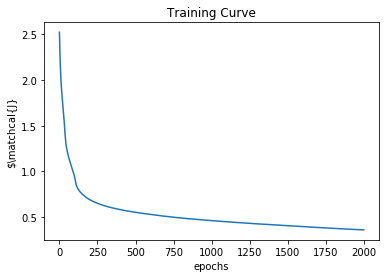

In [38]:
ann = ANN([20, 20,20,10],[ReLU,np.tanh,np.tanh, np.tanh])
#ann.fit(train_X, train_y, eta = 1e-2, epochs = 2e3, show_curve = True)
ann.fit(X_smot,y_smot, eta = 1e-2, epochs = 2e3, show_curve = True)

In [39]:
#y_hat_train = ann.predict(train_X)
y_hat_train = ann.predict(X_smot)
y_hat_valid = ann.predict(valid_X)
y_hat_test = ann.predict(test_X)
    
#print(f"Training Accuracy: {accuracy(train_y, y_hat_train):0.4f}")
print(f"Training Accuracy: {accuracy(y_smot, y_hat_train):0.4f}")
print(f"valid Accuracy: {accuracy(valid_y, y_hat_valid):0.4f}")
print(f"Test Accuracy: {accuracy(test_y, y_hat_test):0.4f}")


Training Accuracy: 0.8376
valid Accuracy: 0.7655
Test Accuracy: 0.7620


In [35]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = y_hat_test

classes=[0,1]

cm =confusion_matrix(y_true, y_pred, labels=[0,1])
cm

array([[981,   2],
       [ 17,   0]], dtype=int64)

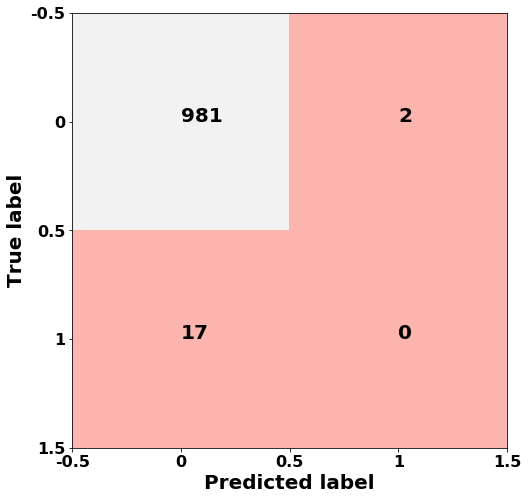

In [36]:
#cm = np.round (cm.astype('int'),2)
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(cm, cmap=plt.cm.Pastel1)
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show(block=False)
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(cm[i][j]),fontweight="bold",fontsize=20)
      
        plt.xticks([-0.5,0,0.5,1,1.5],labels=[-0.5,0,0.5,1,1.5],fontsize=16, fontweight="bold")
        plt.yticks([-0.5,0,0.5,1,1.5],labels=[-0.5,0,0.5,1,1.5],fontsize=16, fontweight="bold")
plt.ylabel('True label',fontsize=20, fontweight="bold")
plt.xlabel('Predicted label',fontsize=20, fontweight="bold")
plt.savefig("./ConfusionMatricsTestSetKNN.png" , dpi=150)
plt.show()